In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# read in csv file and creating an original df which we wont change. Setting the literacy year start at 1991 since the unemployment set goes back to 1991.

csv_file_path = r'..\Data\Literacy\literacy-rate-adults.csv'
df_lit_original= pd.read_csv(csv_file_path)
df_lit = df_lit_original.copy()
df_lit = df_lit[df_lit['Year'] >= 1980]
df_lit.head()

,Entity,Code,Year,"Literacy rate, adult total (% of people ages 15 and above)"
1,Afghanistan,AFG,2011,31.44885
2,Afghanistan,AFG,2021,37.26604
3,Albania,ALB,2001,98.71298
4,Albania,ALB,2008,95.93864
5,Albania,ALB,2011,96.84530


In [3]:
# read in csv file and creating an original df which we wont change.

csv_file_path = r'C:\Users\gijsv\OneDrive\Documenten\Ironhack\week3\project\Data\Unemployment\unemployment-rate.csv'
df_un_original = pd.read_csv(csv_file_path)
df_un = df_un_original.copy()

In [21]:
# Merging literacy and unemployment data sets on country and year, dropping unnecessary columns.

merged_df = pd.merge(df_lit, df_un, on=['Entity', 'Year'], how='inner')
merged_df = merged_df.drop(columns=['Code_x', 'Code_y'] , errors='ignore')
merged_df.rename(columns={'Entity': 'country', 'Literacy rate, adult total (% of people ages 15 and above)' : 'literacy_rate_%','Unemployment, total (% of total labor force) (modeled ILO estimate)' : 'unemployment_rate_%', 'Year' : 'year'}, inplace=True)
merged_df.head(10)

,country,year,literacy_rate_%,unemployment_rate_%
0,Afghanistan,2011,31.44885,11.054
1,Afghanistan,2021,37.26604,13.283
2,Albania,2001,98.71298,18.575
3,Albania,2008,95.93864,13.060
4,Albania,2011,96.84530,13.480
5,Albania,2012,97.24697,13.380
6,Albania,2018,98.14115,12.300
7,Albania,2021,98.45000,11.819
8,Algeria,2002,69.87350,25.900
9,Algeria,2006,72.64868,12.270


In [6]:
# Correlation check between literacy change and unemployment change
correlation = merged_df['literacy_rate_%'].corr(merged_df['unemployment_rate_%'])
print(correlation)

0.23263058185437377


In [7]:
# Check correlation per country
grouped_country = merged_df.groupby('country')

for country, group_df in grouped_country:
    correlation = group_df['literacy_rate_%'].corr(group_df['unemployment_rate_%'])
    print(f"Correlation for {country}: {correlation}")

Correlation for Afghanistan: 1.0
Correlation for Albania: 0.3400196180073915
Correlation for Algeria: -0.7340360797384556
Correlation for Angola: 0.5324294728664845
Correlation for Argentina: -0.24243482393867458
Correlation for Armenia: 0.9640249301185612
Correlation for Azerbaijan: -0.990346665525529
Correlation for Bahrain: 0.9328928468419743
Correlation for Bangladesh: 0.819793667172158
Correlation for Barbados: 1.0197431391105749e-16
Correlation for Belarus: -0.733502430621145
Correlation for Belize: -0.21356580861944507
Correlation for Benin: 0.1259455407473662
Correlation for Bhutan: 0.5673363962736924
Correlation for Bolivia: 0.17700114475119386
Correlation for Bosnia and Herzegovina: 0.4143072059037442
Correlation for Botswana: 0.7236588539476246
Correlation for Brazil: 0.4896457921912556
Correlation for Brunei: 0.9300414579634252
Correlation for Bulgaria: -0.9948373622542251
Correlation for Burkina Faso: 0.9125797253377399
Correlation for Burundi: 0.5282228174975808
Correlati

C:\Users\gijsv\onedrive\documenten\ironhack\week3\project\project_1_env\lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\gijsv\onedrive\documenten\ironhack\week3\project\project_1_env\lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


                             OLS Regression Results                            
Dep. Variable:     unemployment_rate_%   R-squared:                       0.054
Model:                             OLS   Adj. R-squared:                  0.053
Method:                  Least Squares   F-statistic:                     71.23
Date:                 Wed, 06 Mar 2024   Prob (F-statistic):           8.72e-17
Time:                         17:26:25   Log-Likelihood:                -3857.2
No. Observations:                 1247   AIC:                             7718.
Df Residuals:                     1245   BIC:                             7729.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.9574      

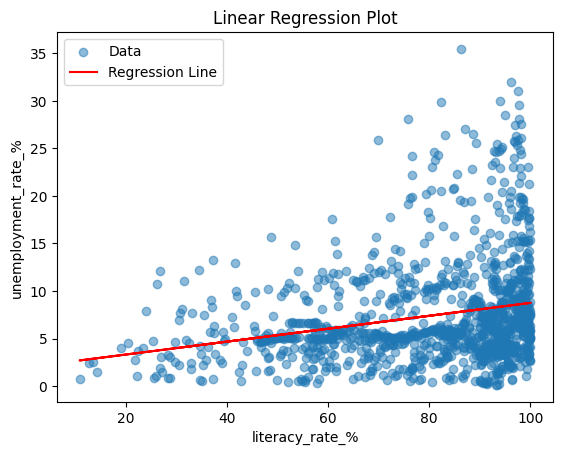

In [8]:
# A more advanced check also giving us the p value and R^2.

missing_values = merged_df.isnull().sum()
df_clean = merged_df.dropna()

X = df_clean['literacy_rate_%']
y = df_clean['unemployment_rate_%'] 

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())
plt.scatter(X['literacy_rate_%'], y, alpha=0.5, label='Data')
plt.plot(X['literacy_rate_%'], model.predict(X), color='red', label='Regression Line')
plt.xlabel('literacy_rate_%')
plt.ylabel('unemployment_rate_%')
plt.title('Linear Regression Plot')
plt.legend()
plt.show()

                             OLS Regression Results                            
Dep. Variable:     unemployment_rate_%   R-squared:                       0.049
Model:                             OLS   Adj. R-squared:                  0.048
Method:                  Least Squares   F-statistic:                     62.14
Date:                 Wed, 06 Mar 2024   Prob (F-statistic):           7.09e-15
Time:                         17:33:24   Log-Likelihood:                -3508.2
No. Observations:                 1213   AIC:                             7020.
Df Residuals:                     1211   BIC:                             7031.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               2.7010      

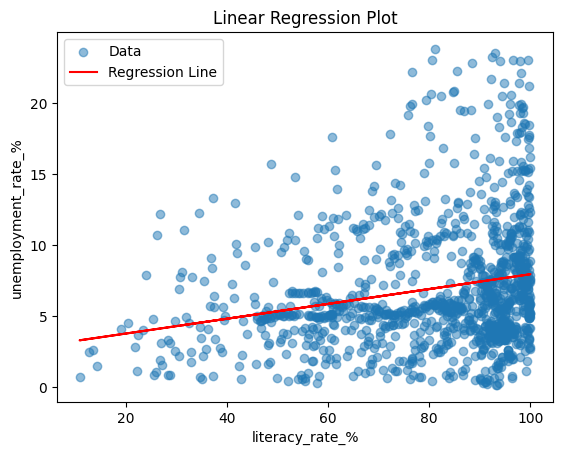

In [25]:
# This time a correlation calculation but without the extreme values. This because extreme values can distort the outcome of a correlation meassurement.
#The extreme's are calculated using the z score and taken out of the df.

z_scores = stats.zscore(merged_df['unemployment_rate_%'])

threshold = 3

merged_df_no_extreme = merged_df[(z_scores < threshold) & (z_scores > -threshold)]
missing_values = merged_df_no_extreme.isnull().sum()
df_clean = merged_df_no_extreme.dropna()

X = df_clean['literacy_rate_%']
y = df_clean['unemployment_rate_%'] 

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())
plt.scatter(X['literacy_rate_%'], y, alpha=0.5, label='Data')
plt.plot(X['literacy_rate_%'], model.predict(X), color='red', label='Regression Line')
plt.xlabel('literacy_rate_%')
plt.ylabel('unemployment_rate_%')
plt.title('Linear Regression Plot')
plt.legend()
plt.show()

In [10]:
# Correlation check without the extreme values in the set.
correlation = df_clean['literacy_rate_%'].corr(df_clean['unemployment_rate_%'])
print(correlation)

0.2209251477233707


In [11]:
merged_df.describe()

,year,literacy_rate_%,unemployment_rate_%
count,1247.000000,1247.000000,1247.000000
mean,2009.000000,80.913567,7.454378
std,8.278266,18.789801,5.487244
min,1991.000000,10.894650,0.140000
25%,2003.000000,70.079160,4.073593
50%,2010.000000,88.482710,5.751000
75%,2016.000000,95.395860,9.274453
max,2021.000000,100.000000,35.457000


                              OLS Regression Results                             
Dep. Variable:     unemployment_rate_log   R-squared:                       0.049
Model:                               OLS   Adj. R-squared:                  0.049
Method:                    Least Squares   F-statistic:                     62.90
Date:                   Wed, 06 Mar 2024   Prob (F-statistic):           4.91e-15
Time:                           17:27:44   Log-Likelihood:                -1346.8
No. Observations:                   1213   AIC:                             2698.
Df Residuals:                       1211   BIC:                             2708.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const   

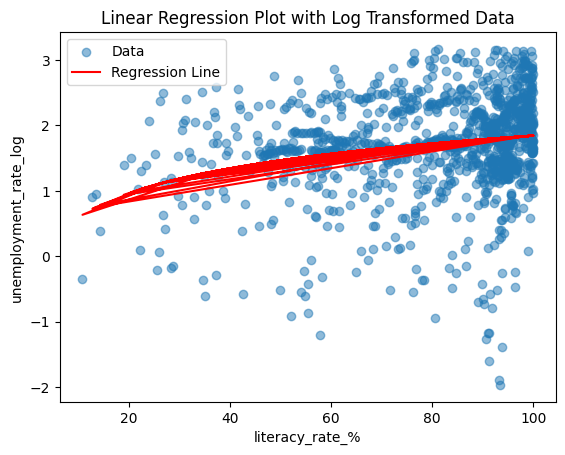

In [16]:
# Transforming both data to log, hoping it will better fit the model. 

df_log = df_clean.copy()

df_log['literacy_rate_log'] = np.log(df_log['literacy_rate_%'])
df_log['unemployment_rate_log'] = np.log(df_log['unemployment_rate_%'])

X_log = df_log['literacy_rate_log']
y_log = df_log['unemployment_rate_log']
X_log = sm.add_constant(X_log)
model_log = sm.OLS(y_log, X_log).fit()

print(model_log.summary())

plt.scatter(df_log['literacy_rate_%'], y_log, alpha=0.5, label='Data')
plt.plot(df_log['literacy_rate_%'], model_log.predict(X_log), color='red', label='Regression Line')
plt.xlabel('literacy_rate_%')
plt.ylabel('unemployment_rate_log')
plt.title('Linear Regression Plot with Log Transformed Data')
plt.legend()
plt.show()

In [26]:
# Log correlation
correlation = df_log['literacy_rate_log'].corr(df_log['unemployment_rate_log'])
print(correlation)

0.2222072704603208


                              OLS Regression Results                              
Dep. Variable:     unemployment_rate_sqrt   R-squared:                       0.053
Model:                                OLS   Adj. R-squared:                  0.053
Method:                     Least Squares   F-statistic:                     68.17
Date:                    Wed, 06 Mar 2024   Prob (F-statistic):           3.88e-16
Time:                            17:27:55   Log-Likelihood:                -1456.1
No. Observations:                    1213   AIC:                             2916.
Df Residuals:                        1211   BIC:                             2926.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

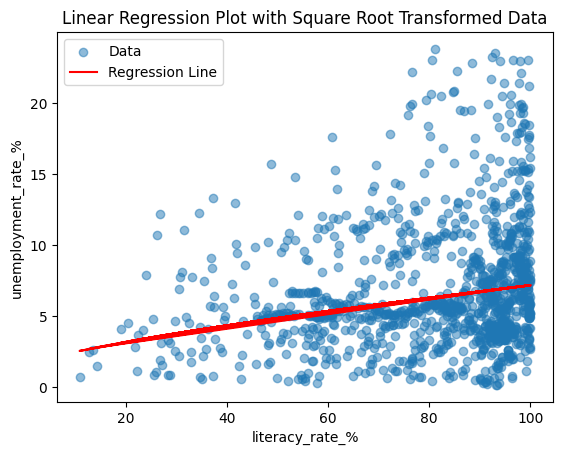

In [18]:
# Transforming both data to log, hoping it will better fit the model. 

df_sqrt = df_clean.copy()
df_sqrt['literacy_rate_sqrt'] = np.sqrt(df_sqrt['literacy_rate_%'])
df_sqrt['unemployment_rate_sqrt'] = np.sqrt(df_sqrt['unemployment_rate_%'])


X_sqrt = df_sqrt['literacy_rate_sqrt']
y_sqrt = df_sqrt['unemployment_rate_sqrt']
X_sqrt = sm.add_constant(X_sqrt)
model_sqrt = sm.OLS(y_sqrt, X_sqrt).fit()


print(model_sqrt.summary())


plt.scatter(df_sqrt['literacy_rate_%'], df_sqrt['unemployment_rate_%'], alpha=0.5, label='Data')
plt.plot(df_sqrt['literacy_rate_%'], np.square(model_sqrt.predict(X_sqrt)), color='red', label='Regression Line')
plt.xlabel('literacy_rate_%')
plt.ylabel('unemployment_rate_%')
plt.title('Linear Regression Plot with Square Root Transformed Data')
plt.legend()
plt.show()

In [19]:
# sqrt correlation
correlation = df_sqrt['literacy_rate_sqrt'].corr(df_sqrt['unemployment_rate_sqrt'])
print(correlation)

0.2308569194057703
